In [17]:
from scipy.interpolate import interp1d, CubicSpline

import numpy as np
import matplotlib.pyplot as plt

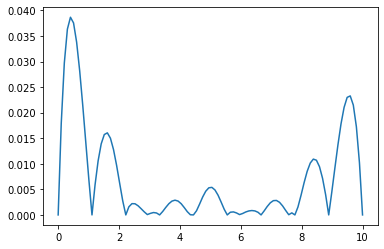

In [95]:
x = np.linspace(0, 10, 10)
y = np.sin(x)

# g = interp1d(x, y)
g = CubicSpline(x, y)

x_ = np.linspace(0, 10, 100)
y_ = g(x_)

y_true = np.sin(x_)

err = np.abs(y_ - y_true)

# plt.scatter(x, y, s=80)
# plt.scatter(x_, y_, s=1)

plt.plot(x_, err)

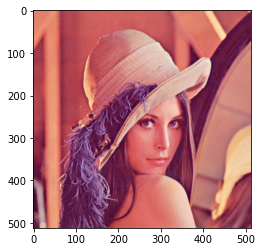

In [33]:
img = plt.imread("lena.png")
plt.imshow(img)

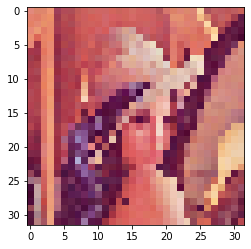

In [43]:
W, H = 512 // 16, 512 // 16

x = np.linspace(0, img.shape[1] - 1, W)
y = np.linspace(0, img.shape[0] - 1, H)

x = np.round(x).astype(int)
y = np.round(y).astype(int)

y, x = np.meshgrid(x, y)

plt.imshow(img[x, y])

In [ ]:
from PIL import Image

pil_img = Image.open('lena.png')
pil_img.resize((1000,1000), resample=Image.LANCZOS)

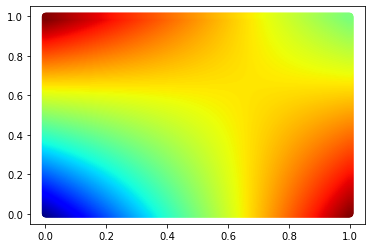

In [56]:
x1, x2 = 0, 1
y1, y2 = 0, 1

Q11, Q12, Q21, Q22 = 0, 1, 1, 0.5

A =[
    [1, x1, y1, x1*y1],
    [1, x1, y2, x1*y2],
    [1, x2, y1, x2*y1],
    [1, x2, y2, x2*y2],
   ]

A = np.array(A)
b = np.array([Q11, Q12, Q21, Q22]).T

O = np.linalg.solve(A, b)

def g(x, y):
    return np.sum(np.array(([1, x, y, x*y]) * O))

x_grid = np.linspace(0, 1, 500)
y_grid = np.linspace(0, 1, 500)

x_grid, y_grid = np.meshgrid(x_grid, y_grid)
x_g, y_g = x_grid.ravel(), y_grid.ravel()

interpolated = g(x_g, y_g)

plt.scatter(x_g, y_g, c=interpolated, cmap='jet')

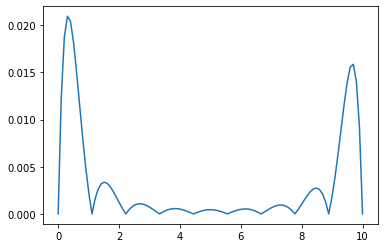

In [92]:
x = np.linspace(0, 10, 10)
y = np.sin(x)

g = np.poly1d(np.polyfit(x, y, y.size - 1))

x_ = np.linspace(0, 10, 100)
y_ = g(x_)
y_true = np.sin(x_)

# plt.scatter(x, y)
# plt.plot(x_, y_)
# plt.scatter(x_, y_true)

err = np.abs(y_true - y_)
plt.plot(x_, err)

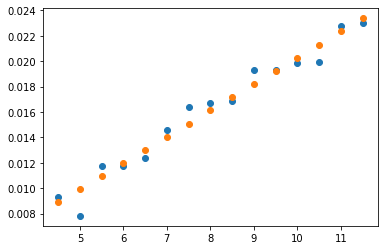

In [77]:
R = 470
r = 20

U = np.arange(4.5, 12, 0.5)

I = U / (R + r) + np.random.randn(U.size) * 0.001

g = np.poly1d(np.polyfit(U, I, deg=1))
I_ = g(U)

plt.scatter(U, I)
plt.scatter(U, I_)

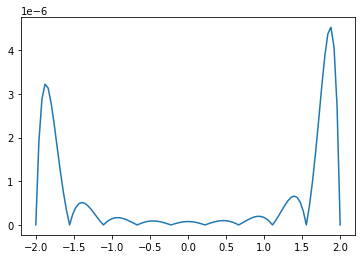

In [90]:
x = np.linspace(-2, 2, 10)
y = np.exp(x)

g = np.poly1d(np.polyfit(x, y, y.size-1))

x_ = np.linspace(-2, 2, 100)
y_ = g(x_)
y_true = np.exp(x_)

# plt.scatter(x, y, s=80)
# plt.scatter(x_, y_, s=10)

err = np.abs(y_true - y_)
plt.plot(x_, err)

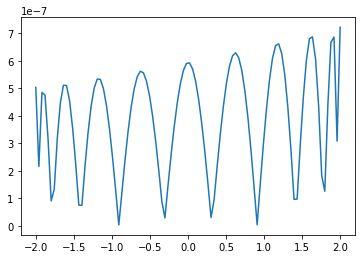

In [89]:
x = np.linspace(-2, 2, 10)
y = np.exp(x)
n = y.size - 1

def tchebspace(x_min, x_max, n):
    t = [np.cos((2 * i - 1) * np.pi / (2 * n)) for i in range(1, n+1)]

    t = np.array(t[::-1])
    xt = (x_max + x_min) / 2 + (x_max - x_min) / 2 *t

    return xt

x = tchebspace(-2, 2, 10)
y = np.exp(x)

g = np.poly1d(np.polyfit(x, y, y.size-1))

x_ = np.linspace(-2, 2, 100)
y_ = g(x_)
y_true = np.exp(x_)

# plt.scatter(x, y, s=80)
# plt.scatter(x_, y_, s=10)

err = np.abs(y_true - y_)
plt.plot(x_, err)